In [ ]:
!pip install keras

In [4]:
!pip install tensorflow

In [6]:
import tensorflow as tf
tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

11490434/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

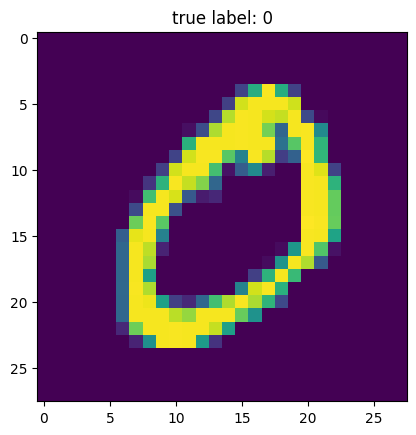

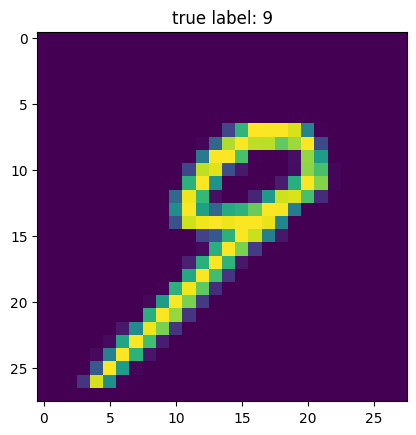

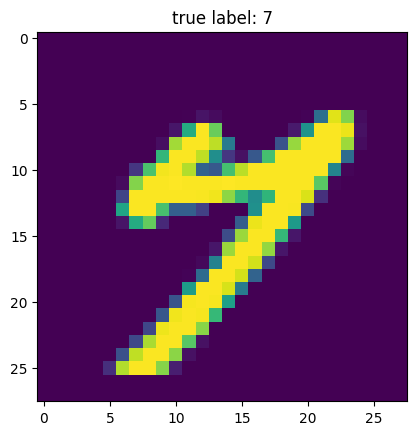

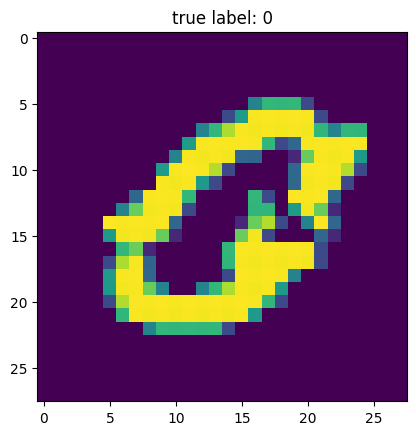

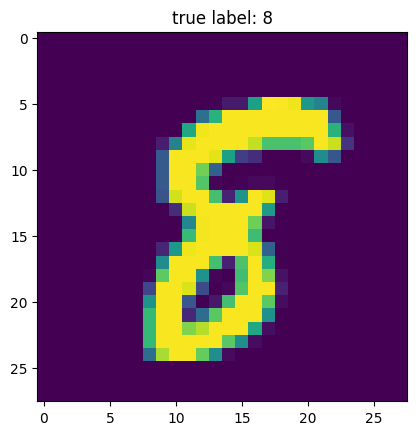

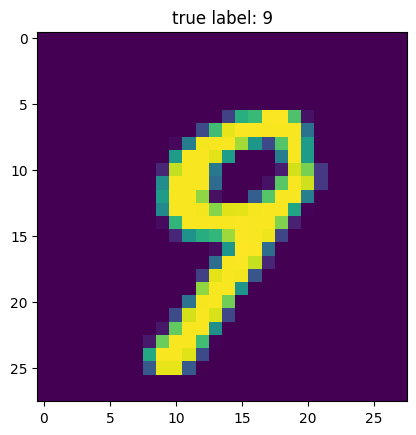

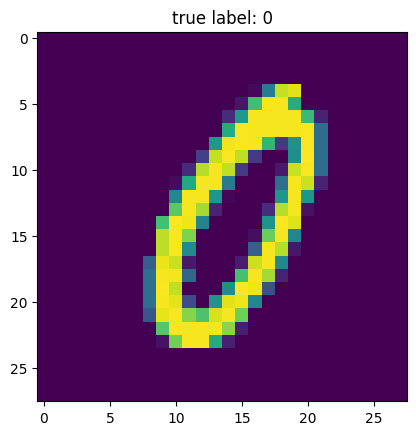

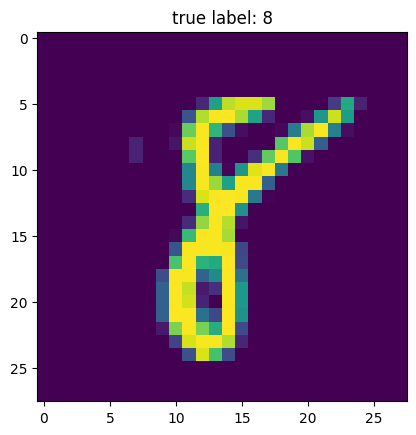

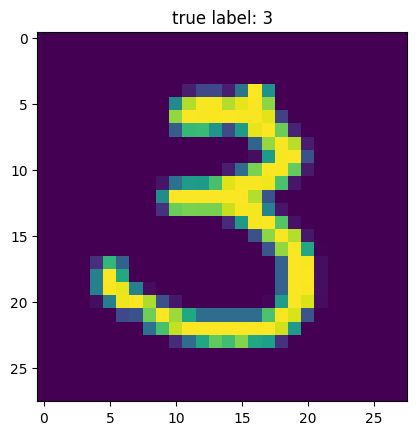

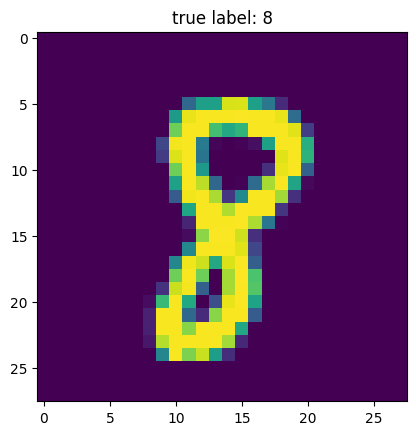

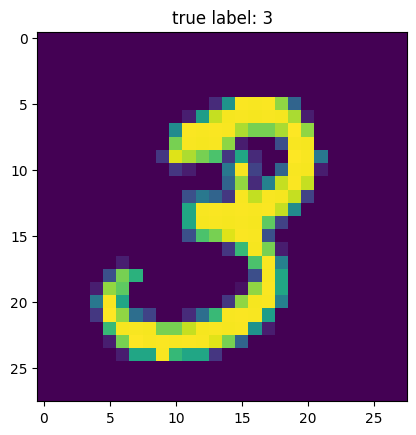

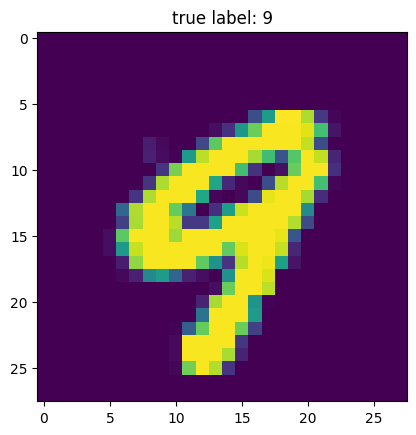

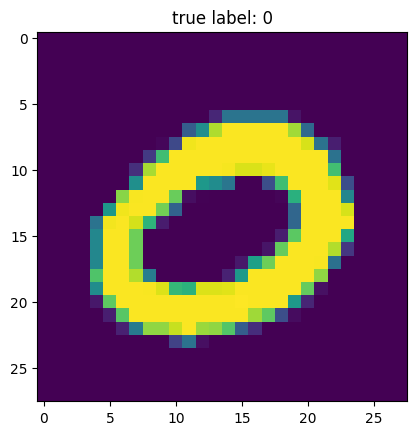

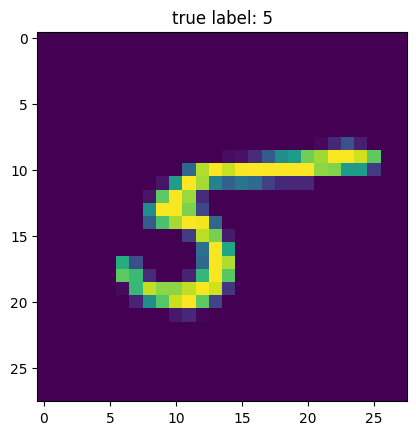

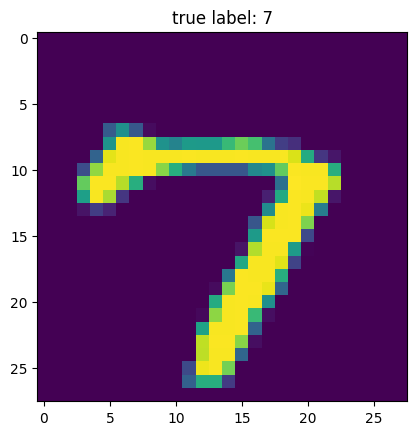

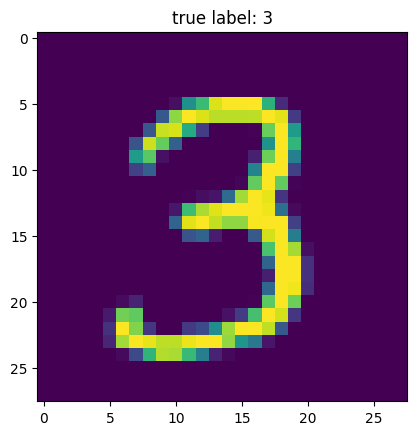

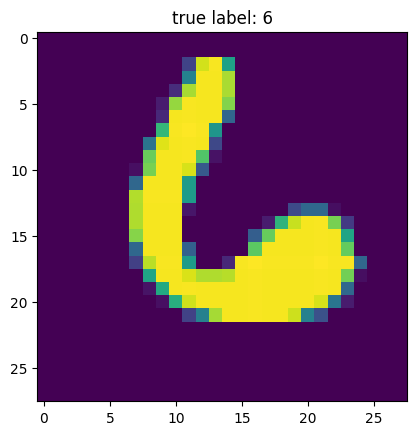

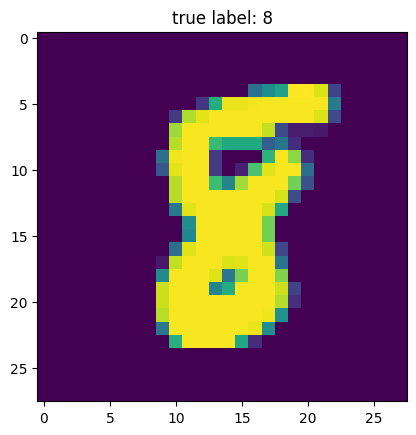

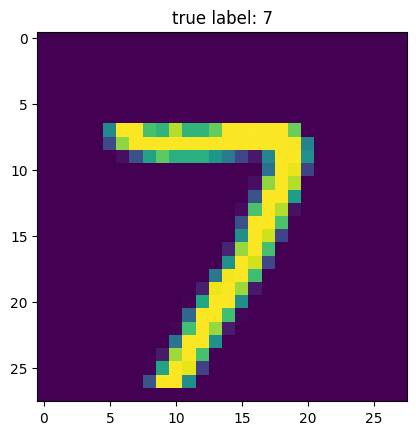

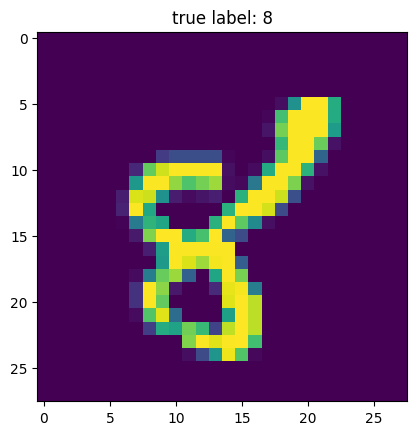

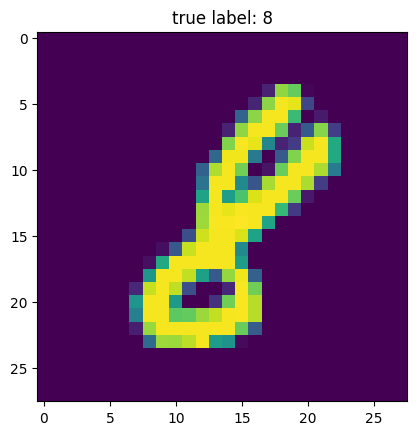

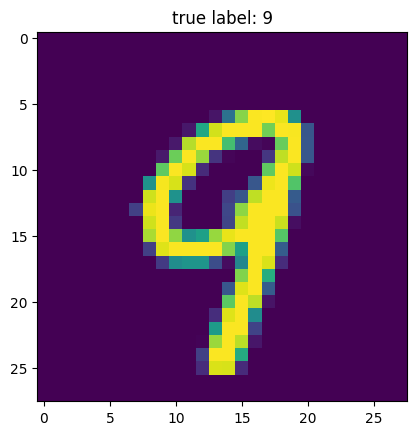

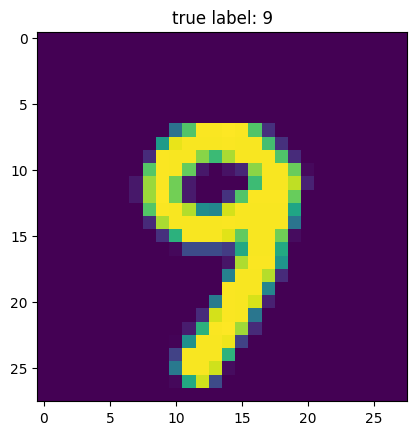

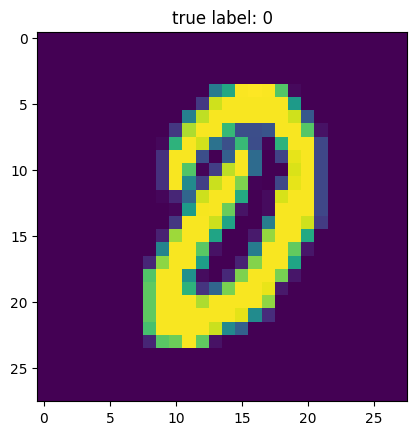

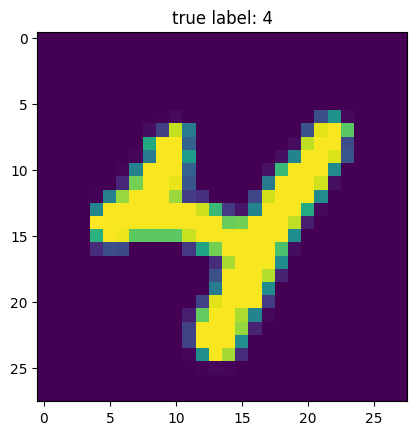

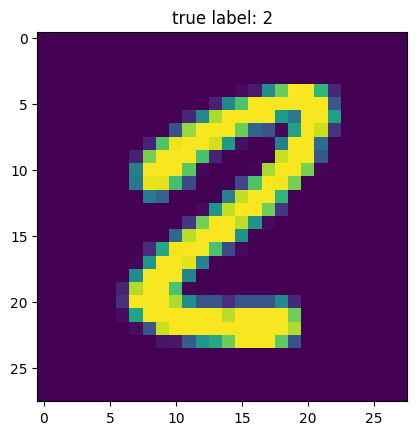

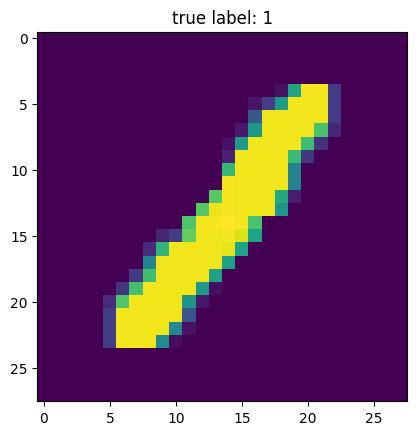

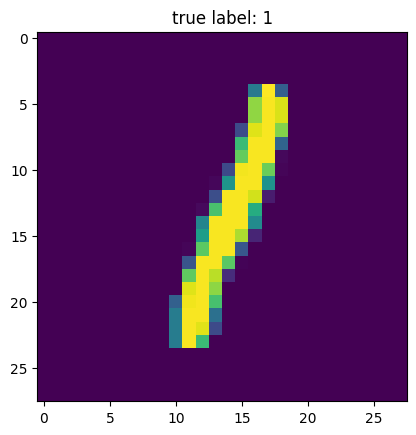

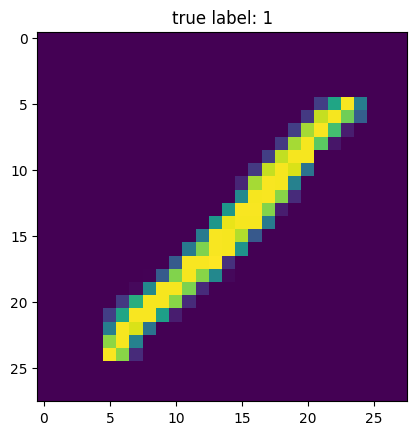

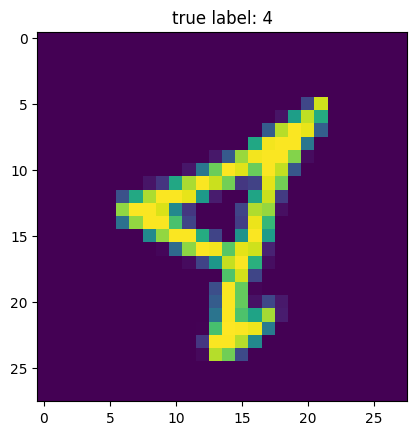

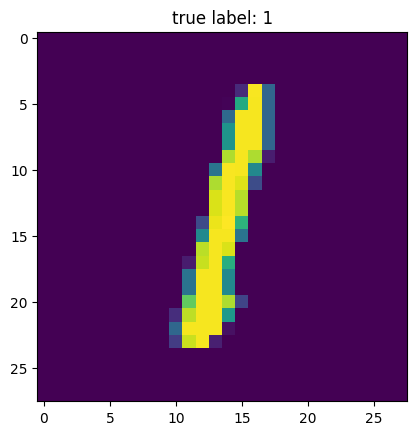

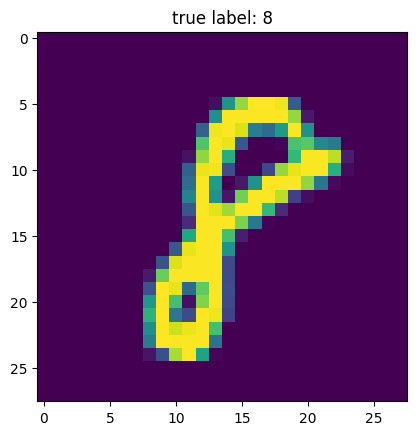

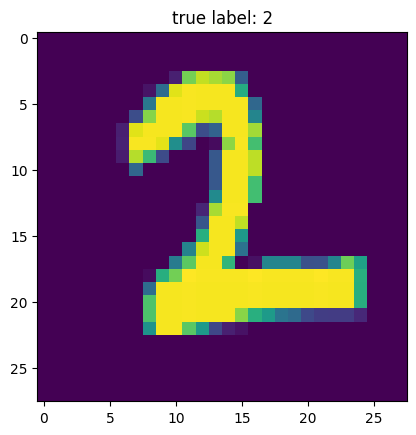

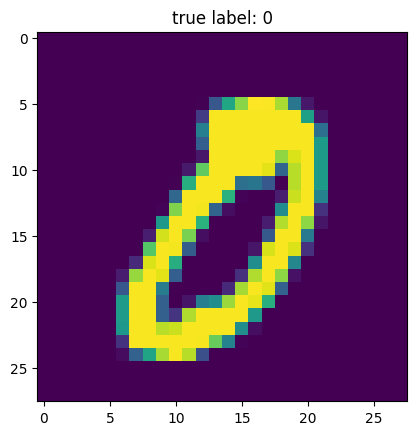

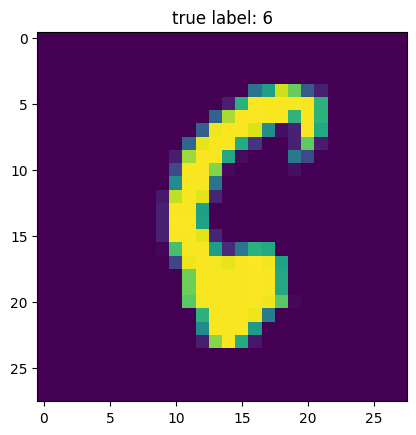

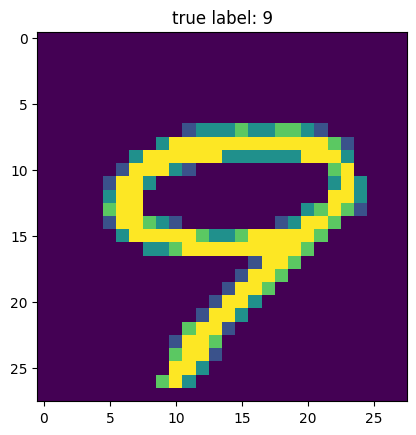

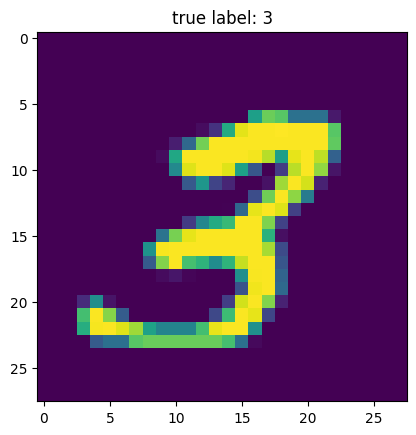

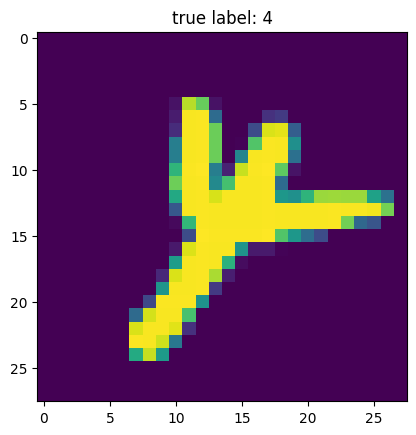

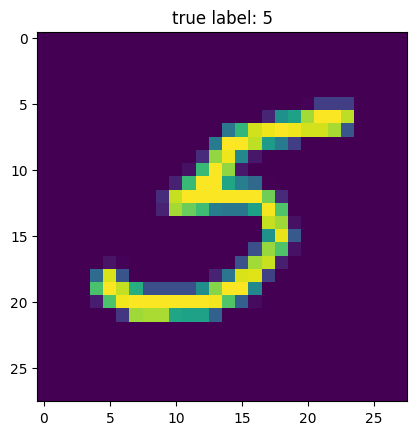

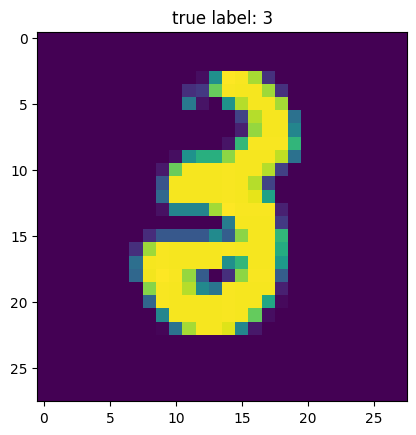

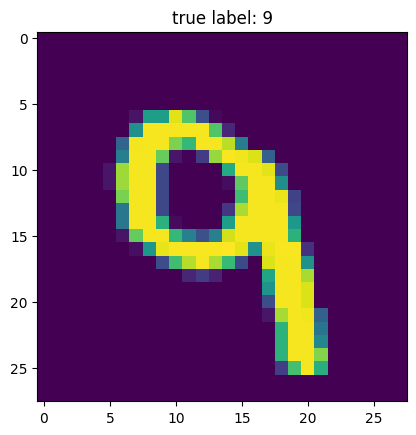

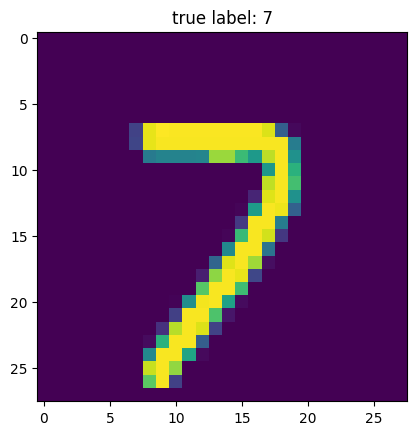

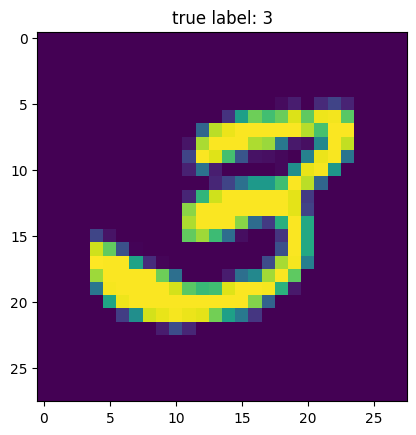

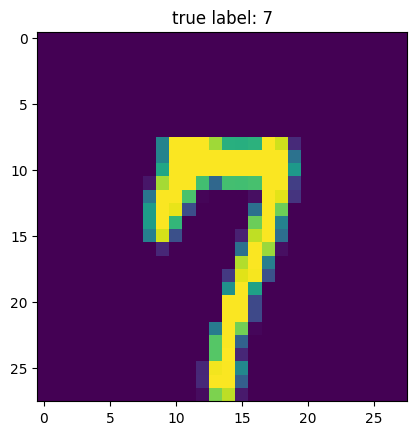

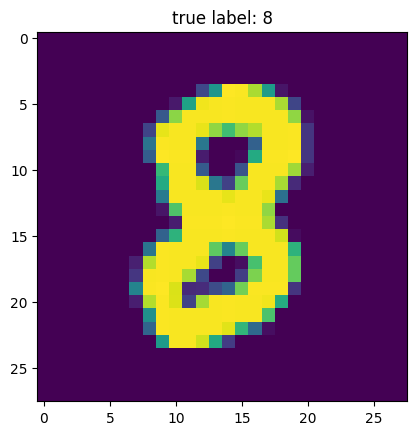

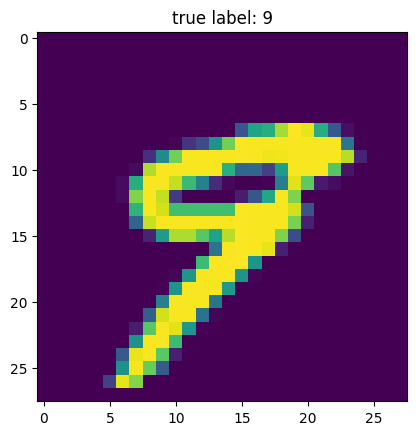

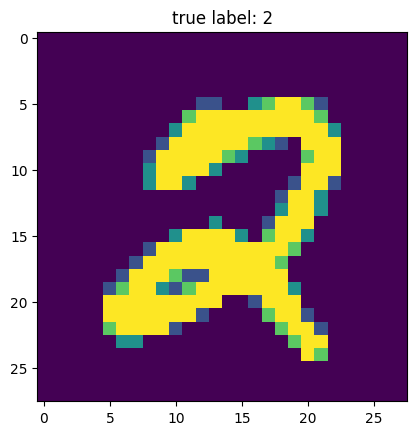

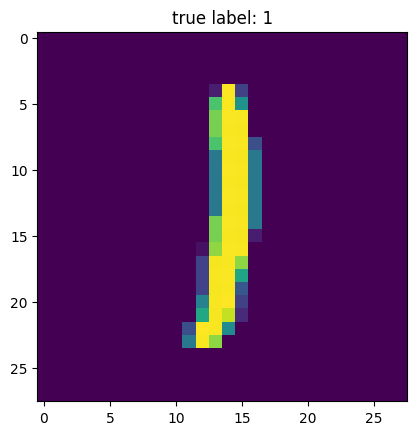

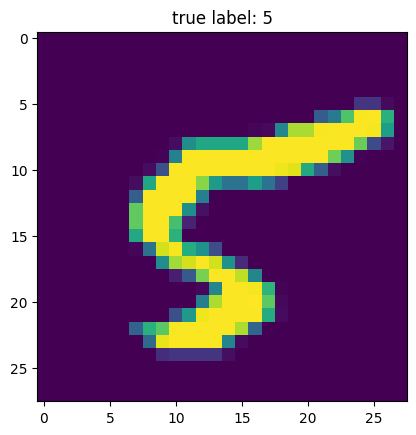

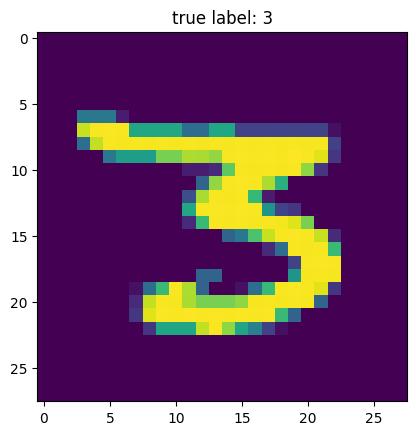

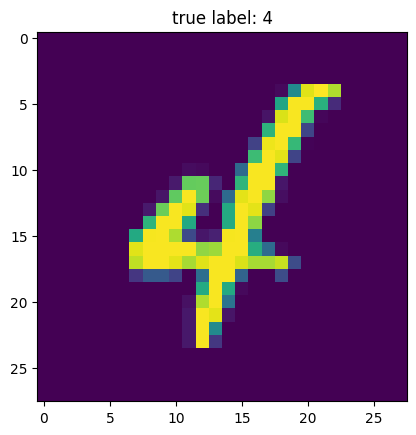

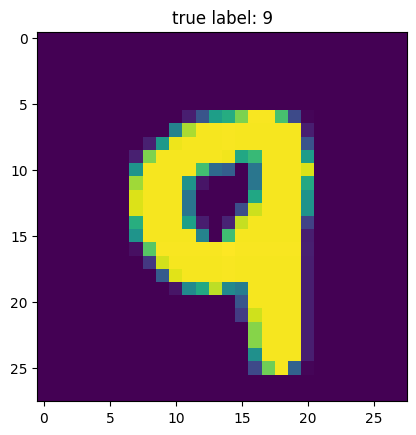

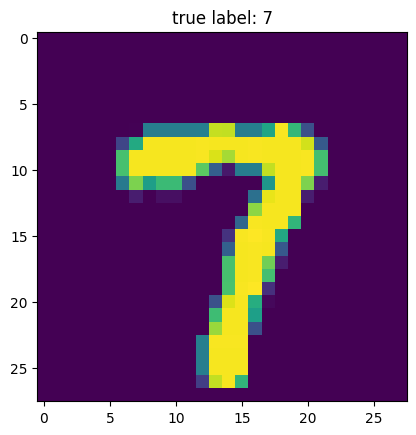

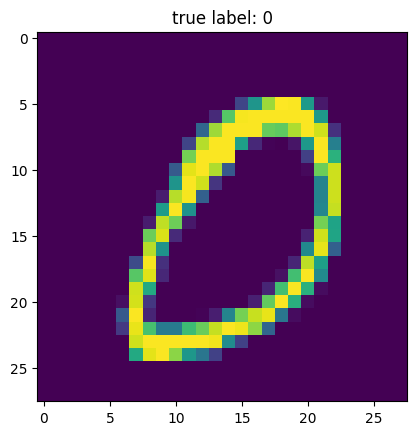

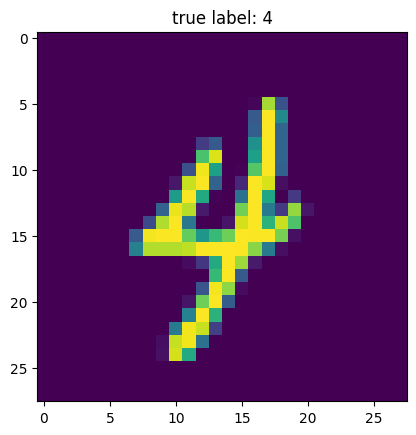

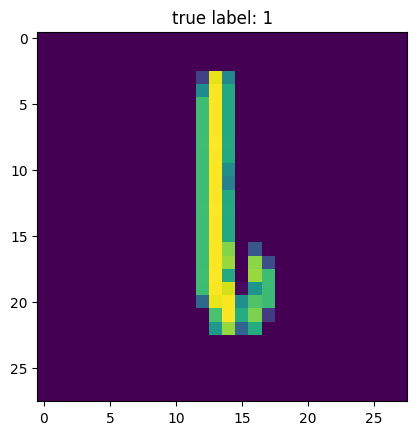

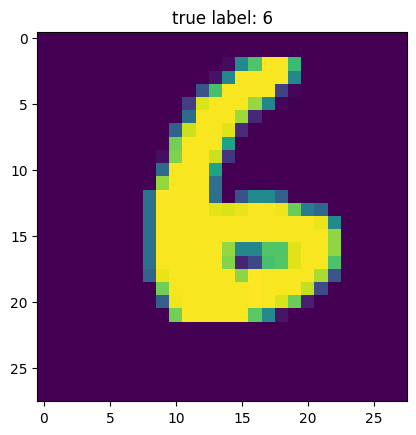

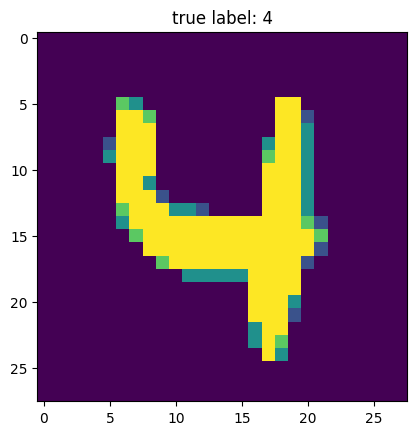

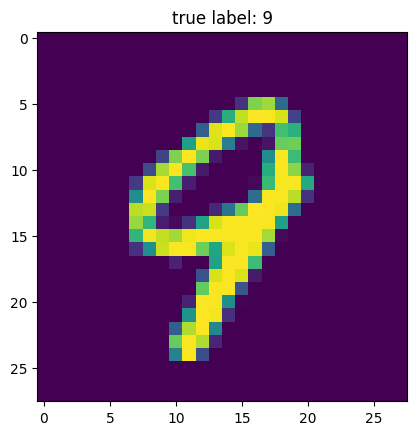

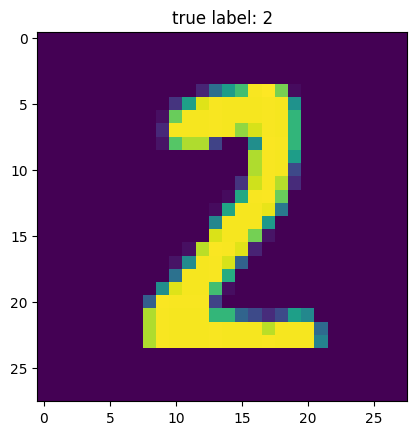

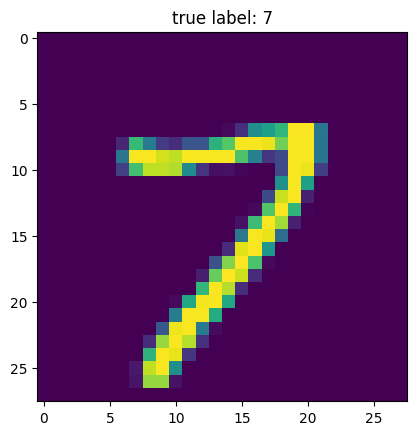

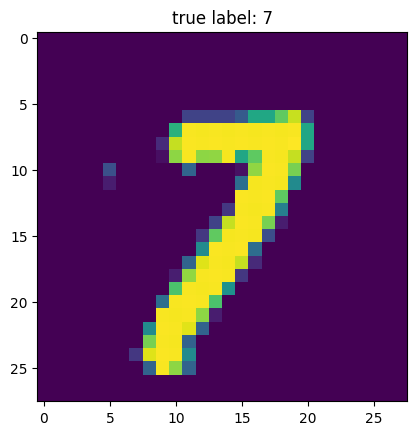

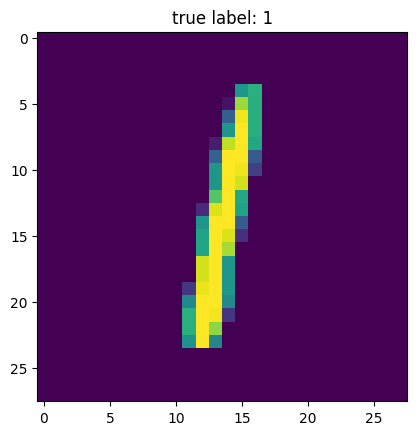

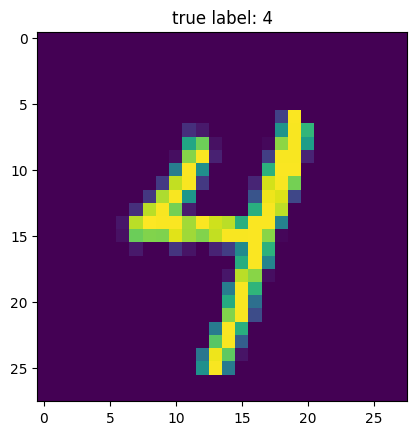

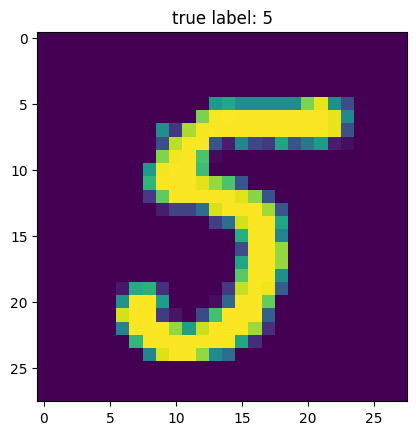

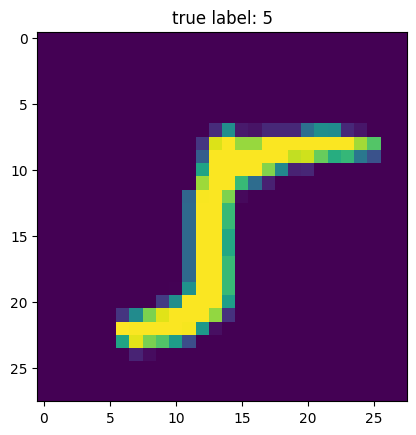

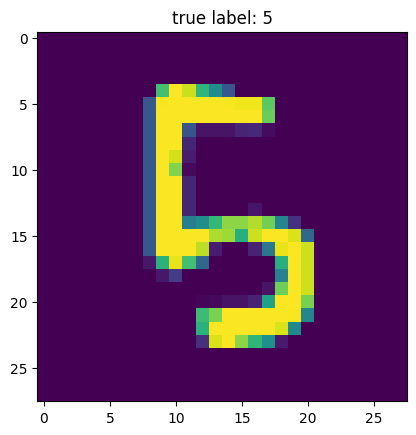

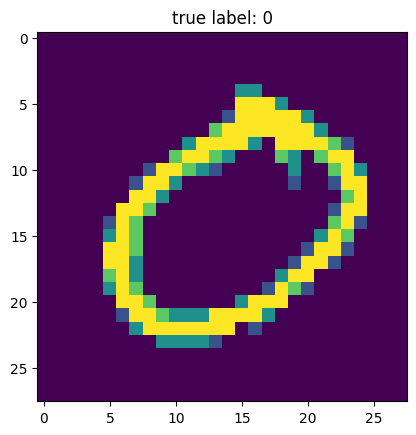

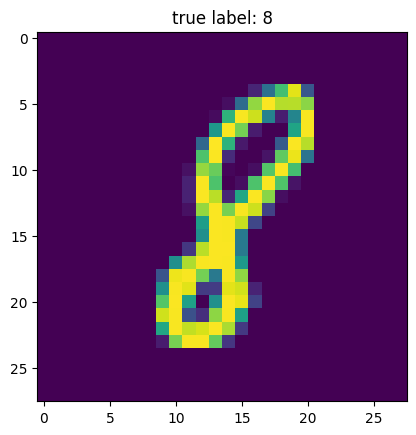

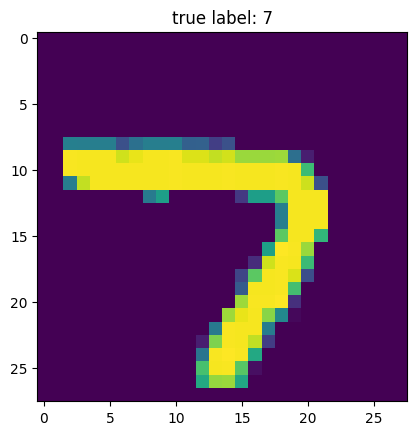

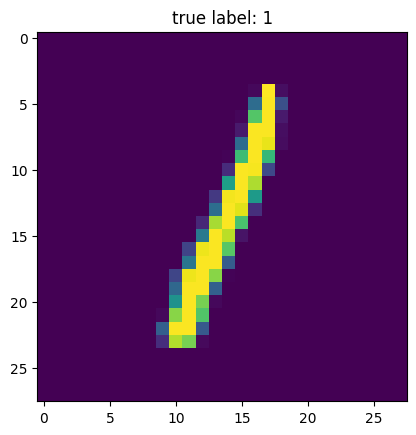

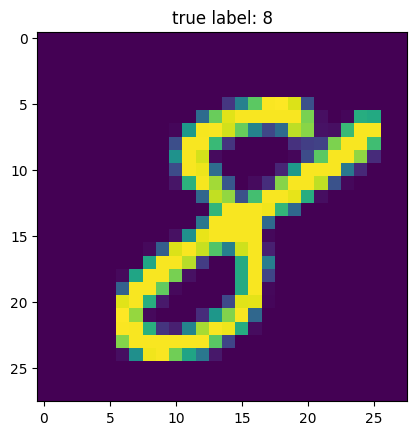

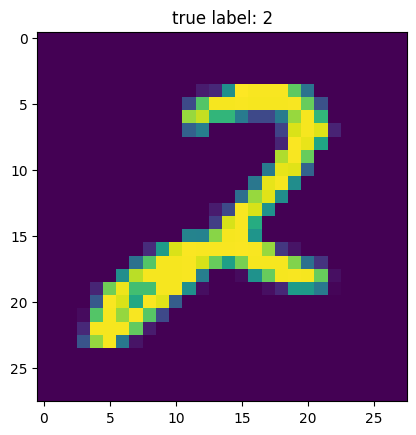

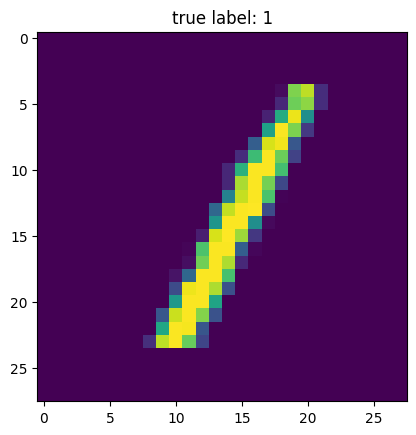

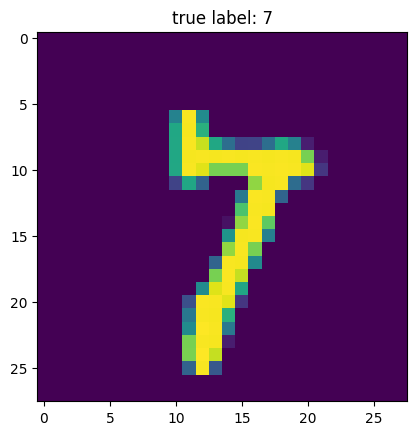

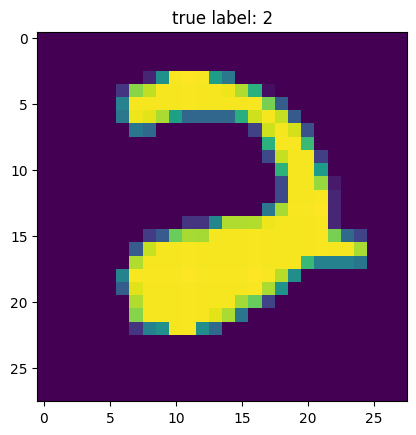

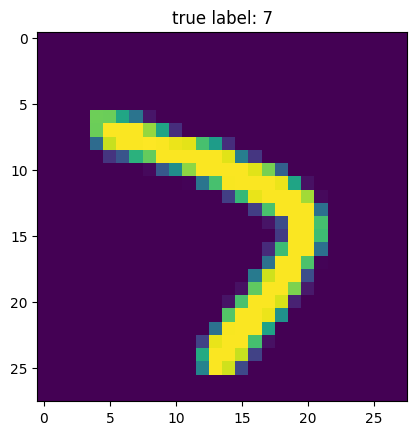

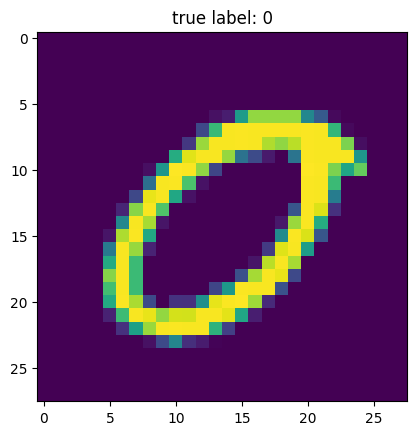

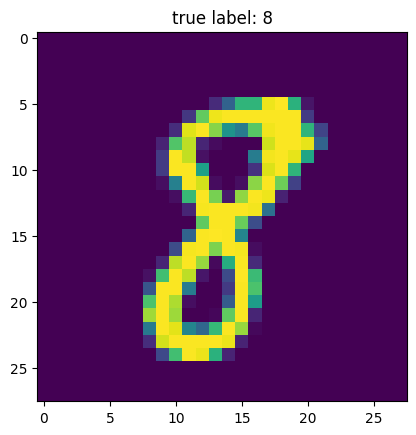

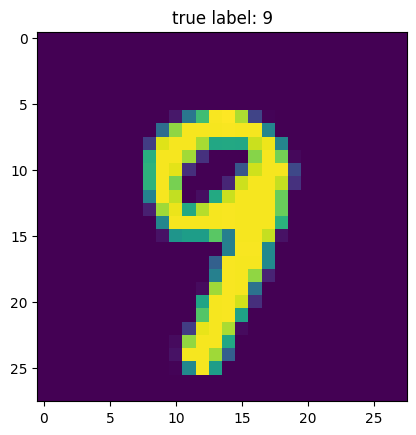

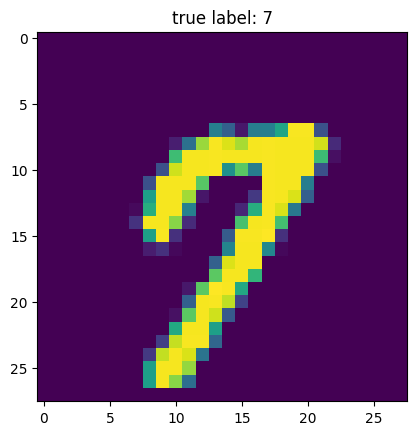

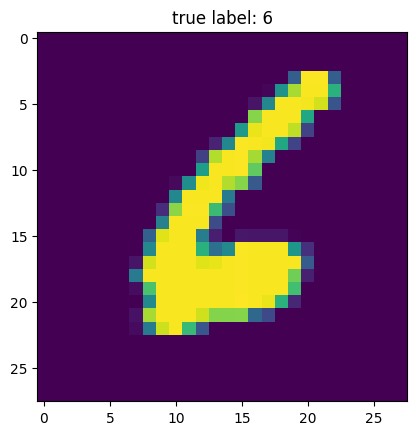

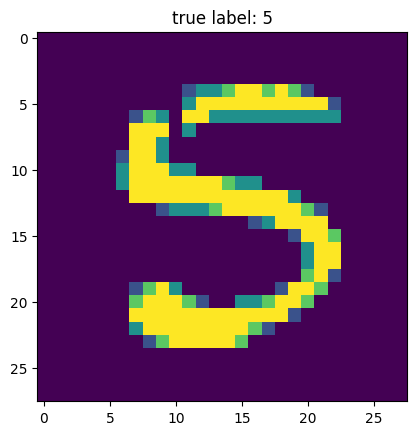

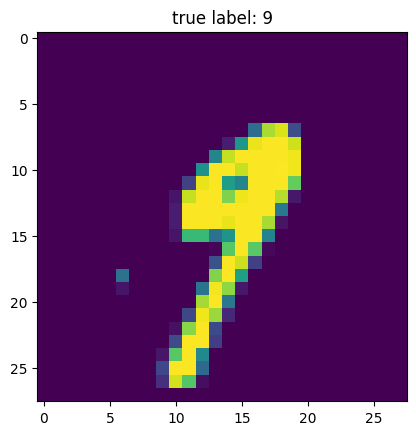

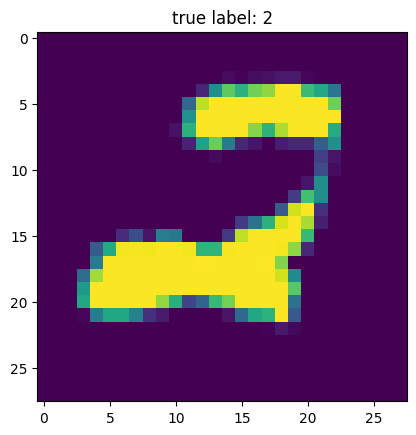

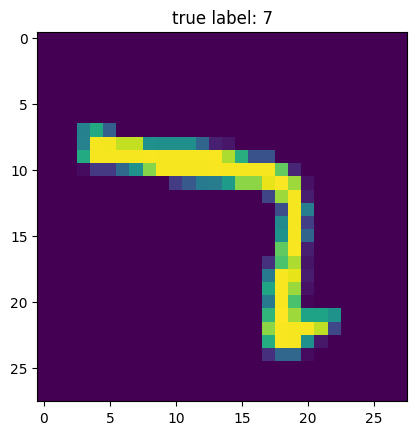

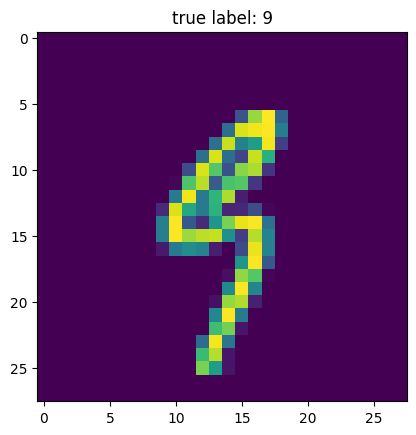

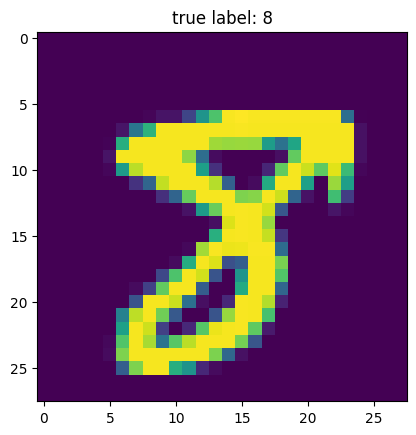

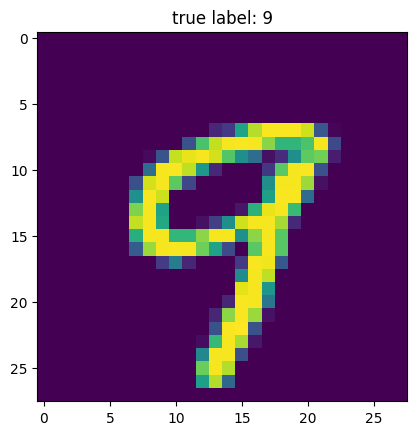

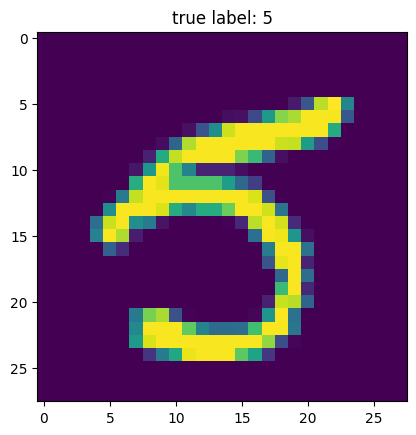

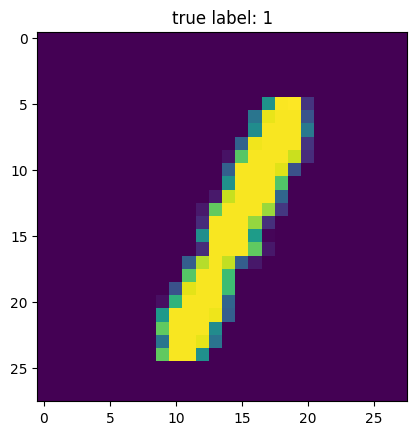

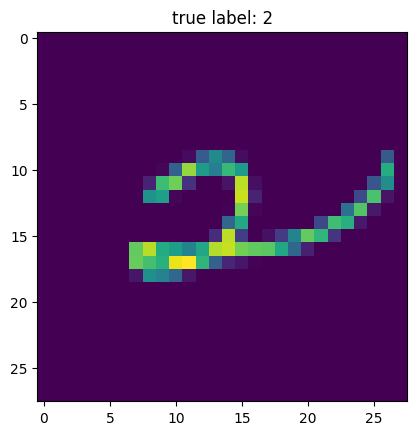

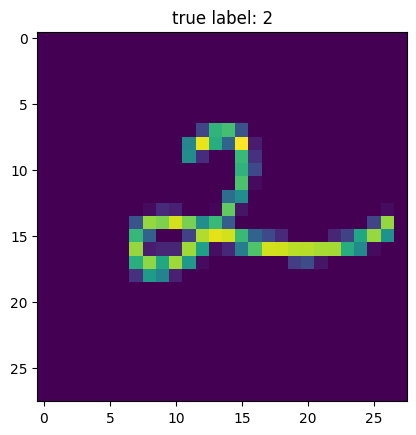

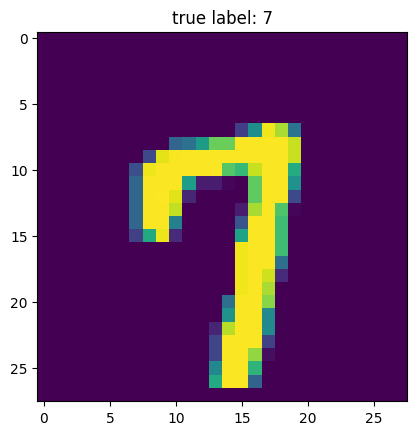

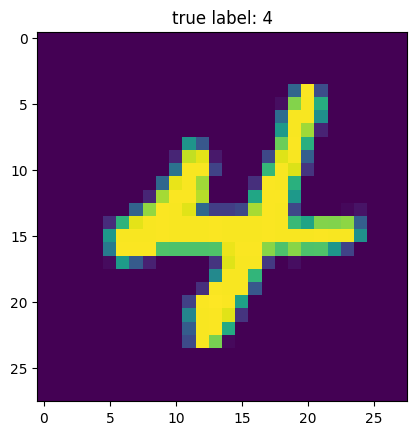

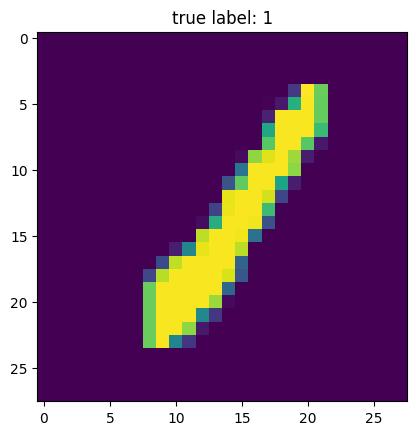

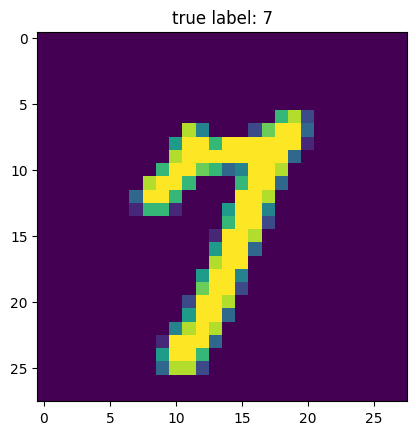

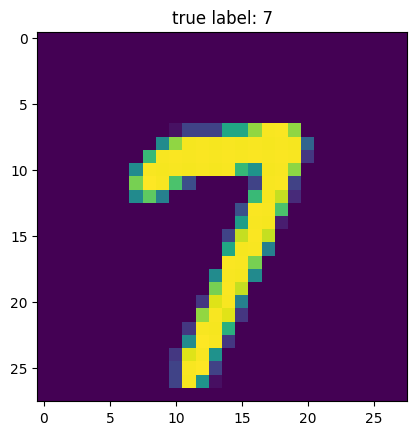

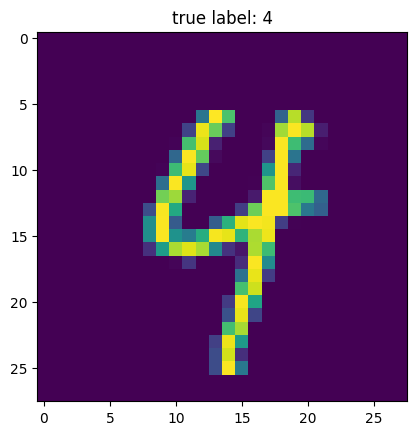

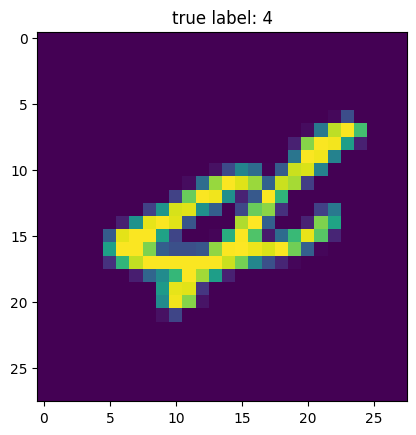

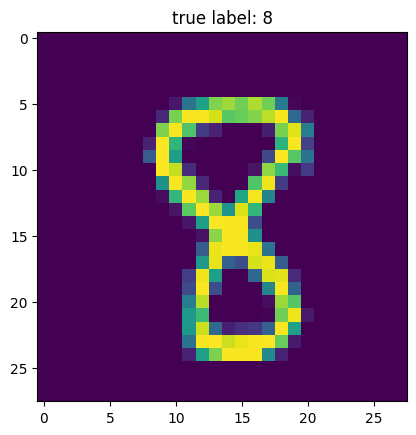

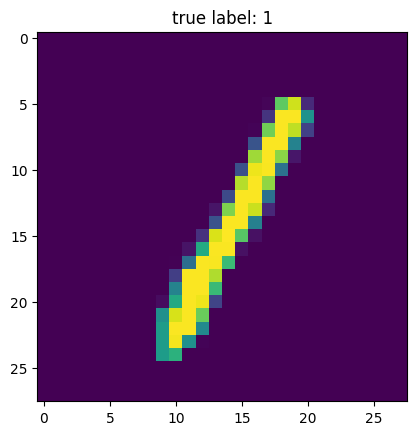

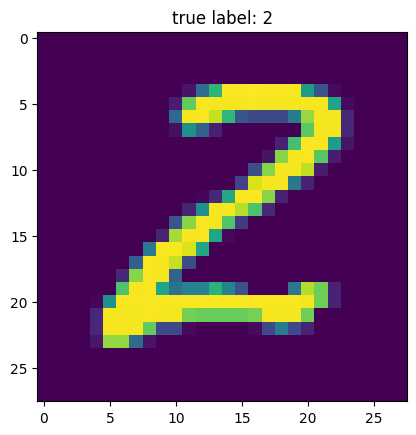

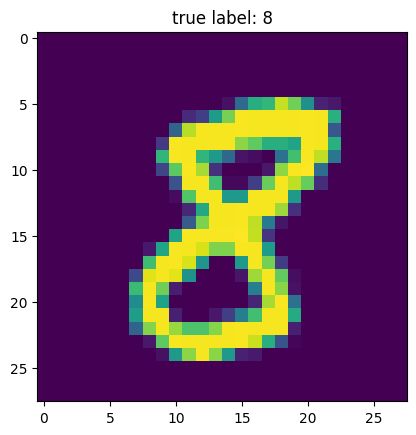

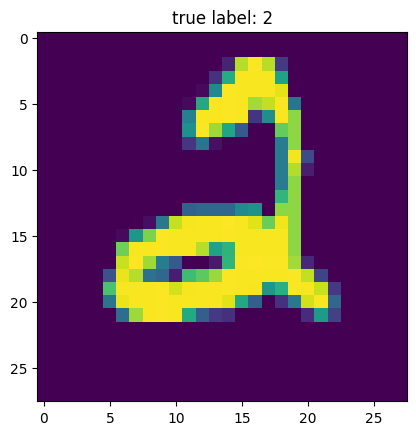

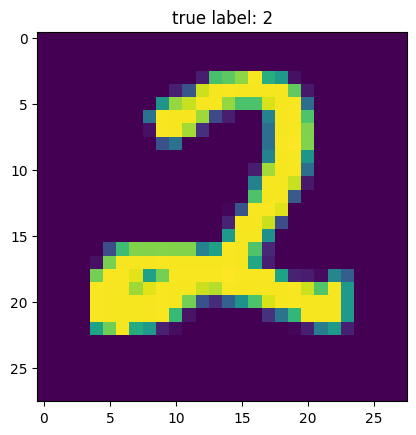

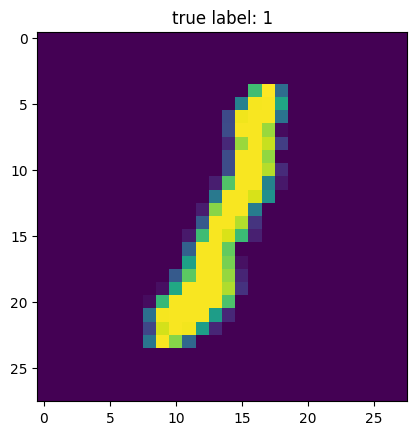

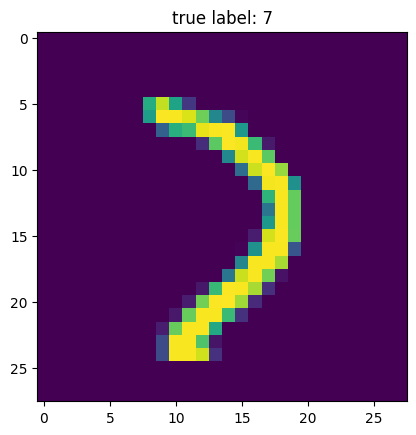

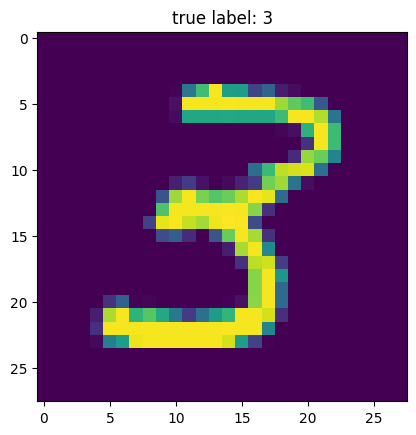

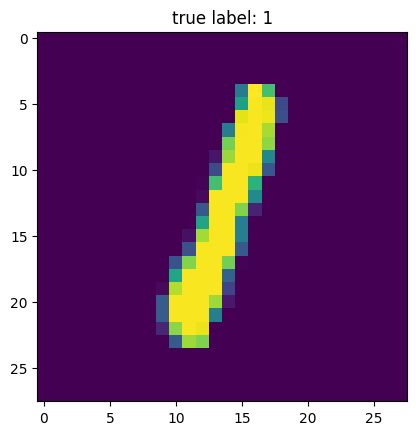

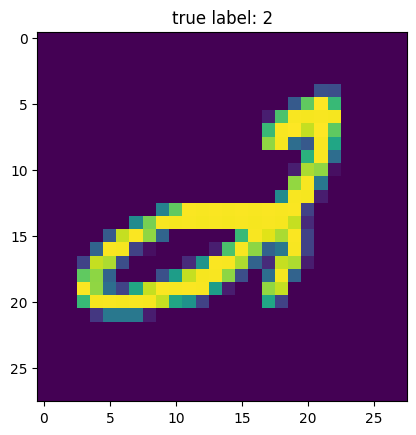

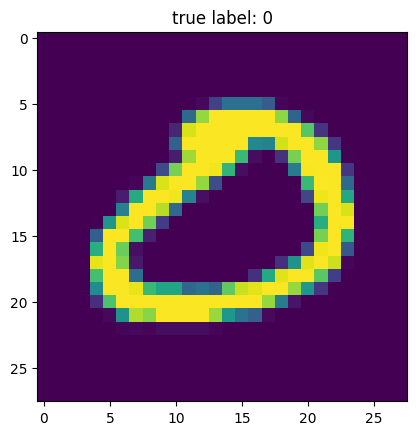

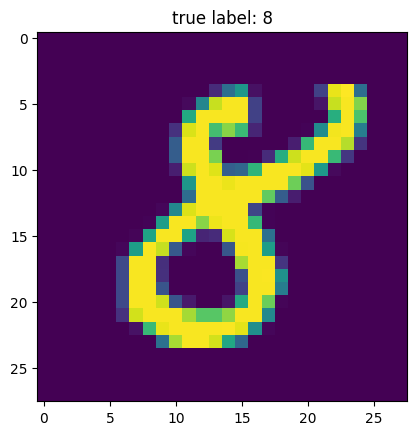

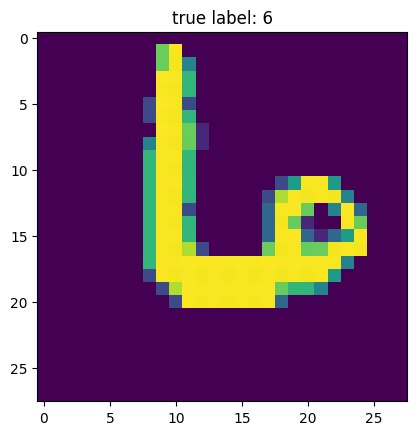

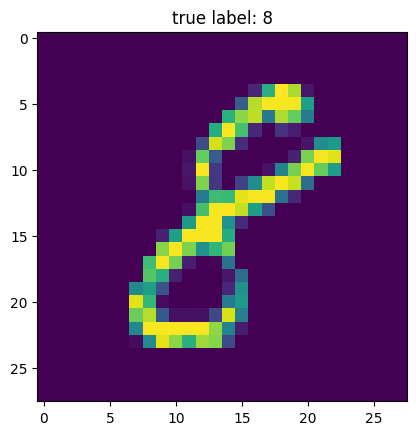

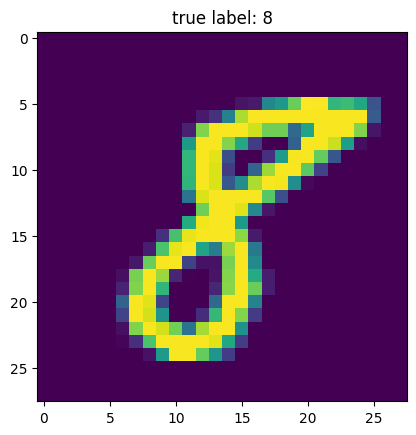

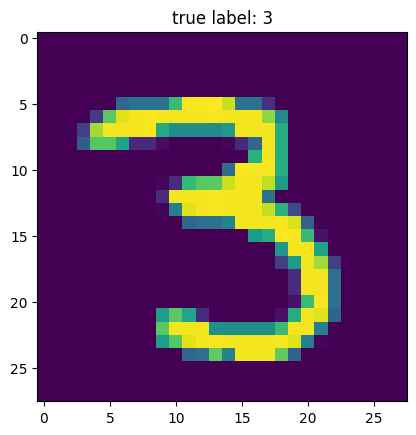

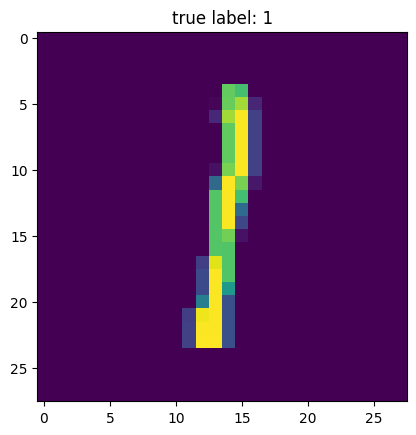

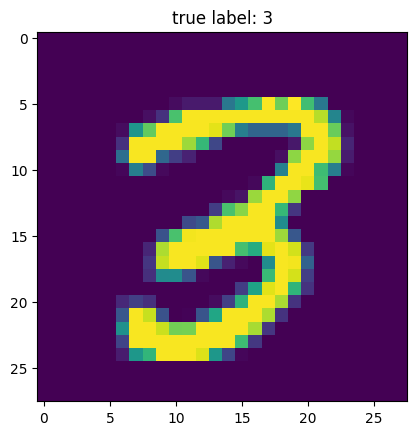

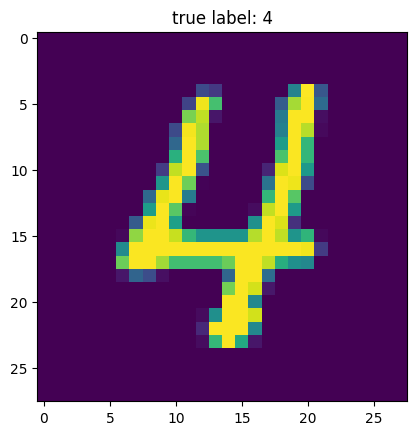

train_x.shape :  (60000, 28, 28)
train y.shape : (60000,)
test_x.shape : (10000, 28, 28)
test y.shape : (10000,)


In [7]:
import matplotlib.pyplot as plt
#from keras.datsets import mnist
from tensorflow.keras.datasets import mnist

def plot_digit(X, y, idx):
    img = X[idx]. reshape (28, 28)
    plt.imshow(img)
    plt.title('true label: %d' % y[idx]) #, cmap='Greys
    plt.show()
(train_x, train_y) , (test_x, test_y) = mnist.load_data()
for i in range(1,60000,500):
    plot_digit(train_x, train_y, i)

print("train_x.shape : ", train_x.shape)
print("train y.shape :" ,train_y.shape)
print("test_x.shape :", test_x.shape)
print("test y.shape :",test_y.shape)

In [8]:
import keras
from tensorflow.keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print (x_train.shape, y_train.shape)
X_train = x_train.reshape(x_train.shape [0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape [0], 28, 28, 1)
input_shape = (28, 28, 1)
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical (y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print ('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape [0], 'test samples')
batch_size = 128
num_classes = 10
epochs = 10
model = Sequential ()
model.add(Conv2D (32, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
# input_shape = (28, 28, 1)
model.add(MaxPooling2D(pool_size= (2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D (pool_size=(2, 2)))
model.add(Flatten ( ))
model.add(Dense (128, activation='relu'))
model.add(Dropout (0.3))
model. add (Dense (64, activation='relu'))
model.add(Dropout (0.5))
model.add(Dense (num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])
hist = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))
print("The model has successfully trained")
score = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score [0])
print('Test accuracy:', score [1])
model.save('mnist.h5')
print("Saving the model as mnist.h5")


(60000, 28, 28) (60000,)
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
Epoch 1/10
469/469 [==============================] - 58s 123ms/step - loss: 2.2979 - accuracy: 0.1265 - val_loss: 2.2685 - val_accuracy: 0.2648
Epoch 2/10
469/469 [==============================] - 60s 128ms/step - loss: 2.2707 - accuracy: 0.1577 - val_loss: 2.2417 - val_accuracy: 0.3198
Epoch 3/10
469/469 [==============================] - 64s 137ms/step - loss: 2.2490 - accuracy: 0.1854 - val_loss: 2.2164 - val_accuracy: 0.3367
Epoch 4/10
469/469 [==============================] - 57s 121ms/step - loss: 2.2272 - accuracy: 0.2098 - val_loss: 2.1908 - val_accuracy: 0.3540
Epoch 5/10
469/469 [==============================] - 62s 131ms/step - loss: 2.2068 - accuracy: 0.2285 - val_loss: 2.1644 - val_accuracy: 0.3789
Epoch 6/10
469/469 [==============================] - 57s 121ms/step - loss: 2.1839 - accuracy: 0.2474 - val_loss: 2.1360 - val_accuracy: 0.4064
Epoch 7/10
469/469 [===============